## You can use firehose to ingest data near real time to your data lake, without writing any code on the consumer side.

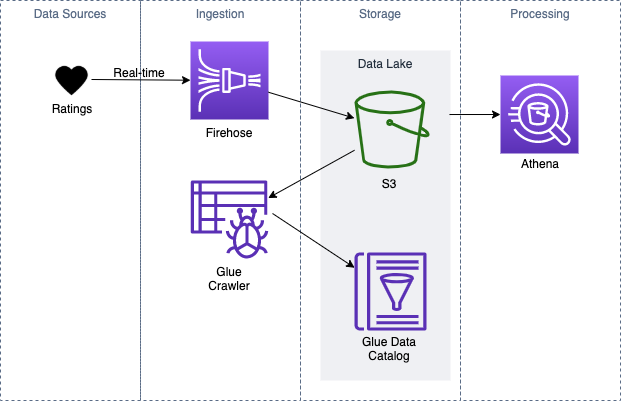

## 1) Create your stream using the console. 
Use prefix data/analytics/realtime/

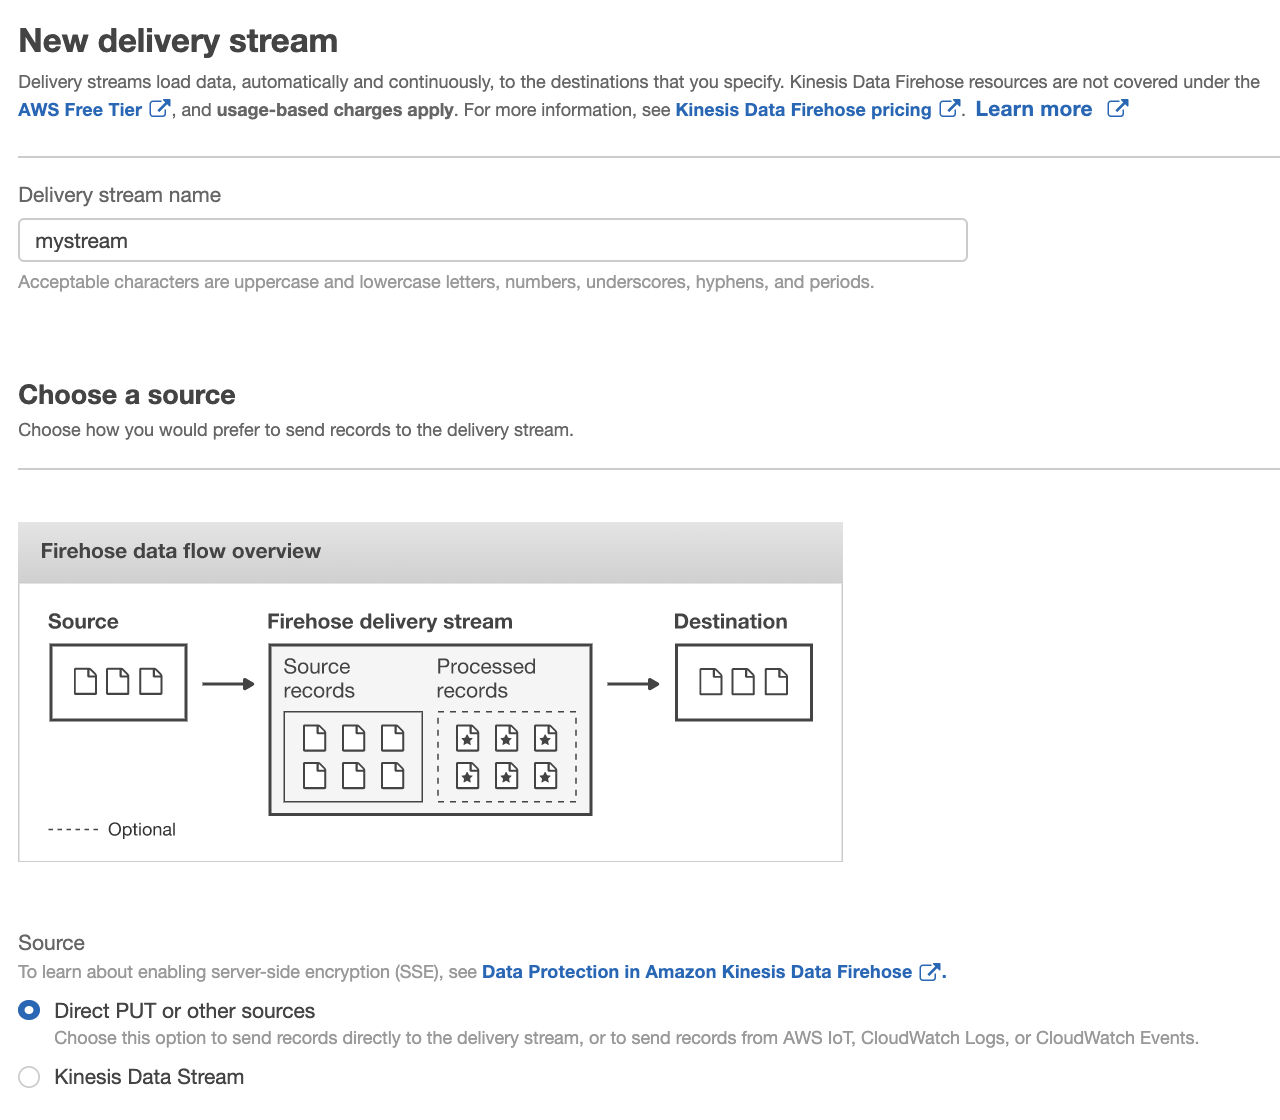

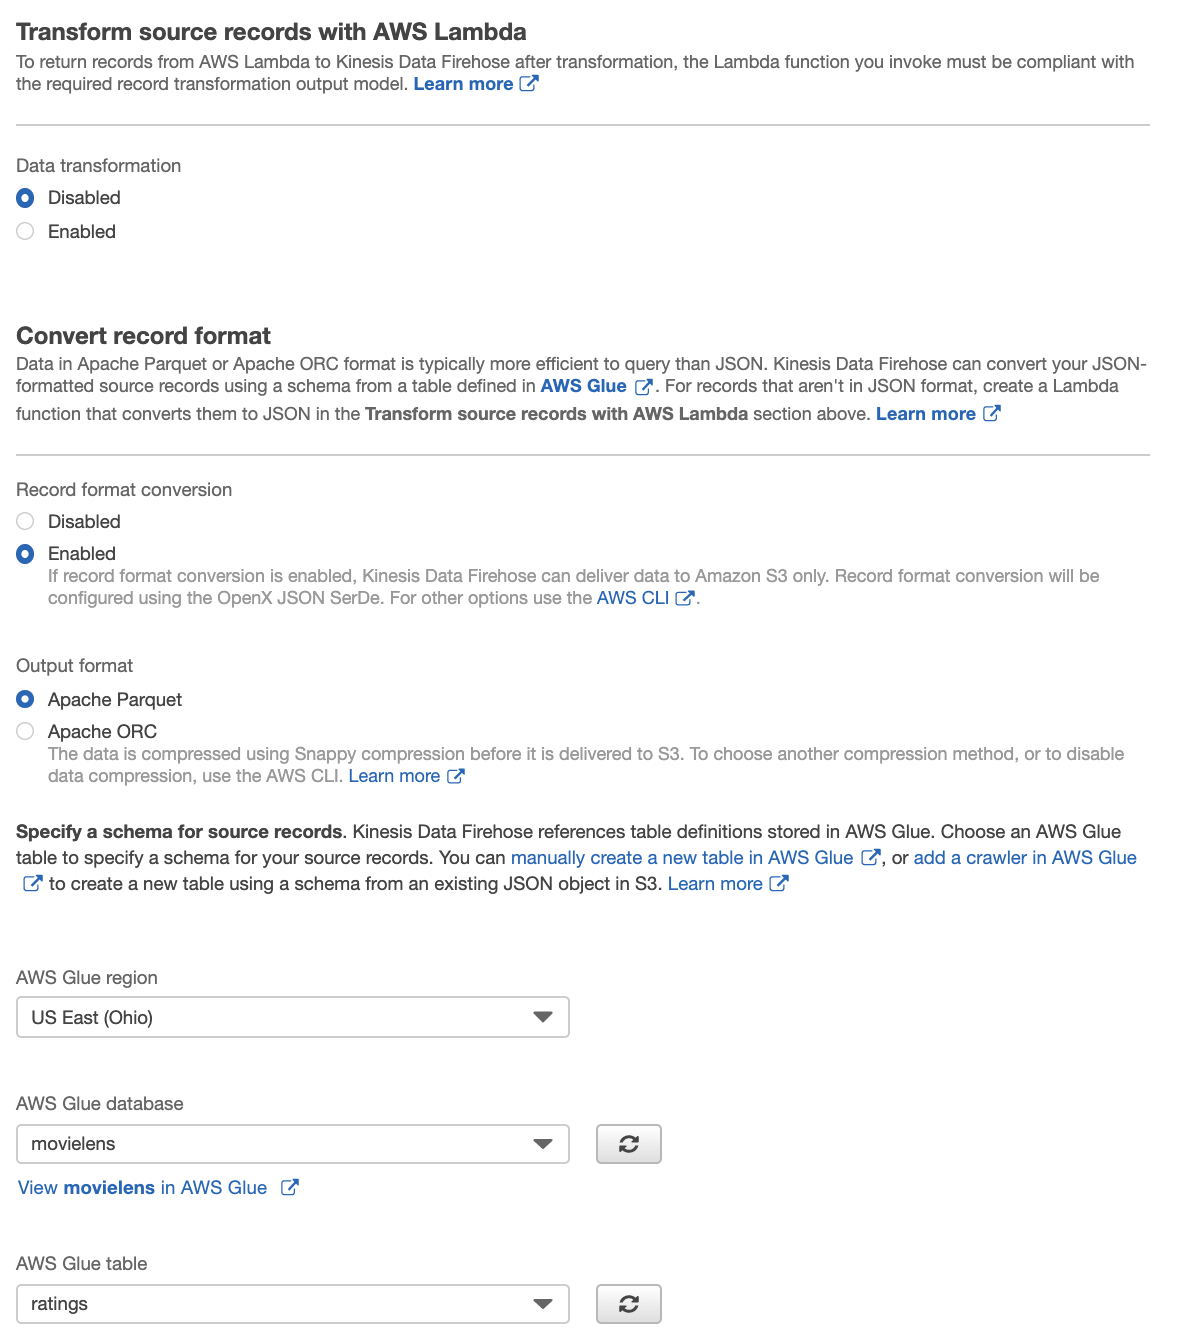

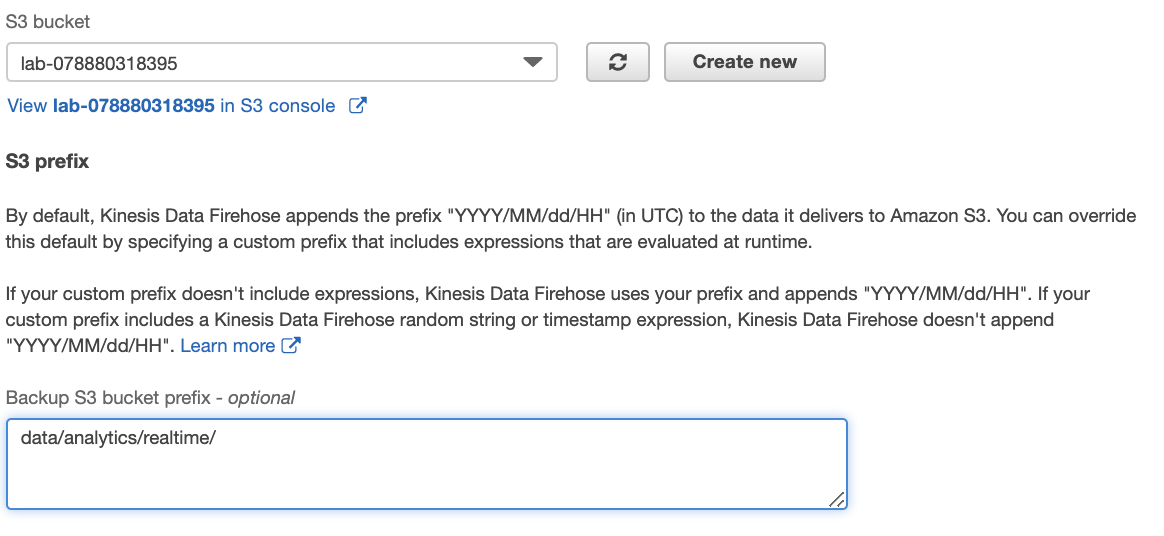

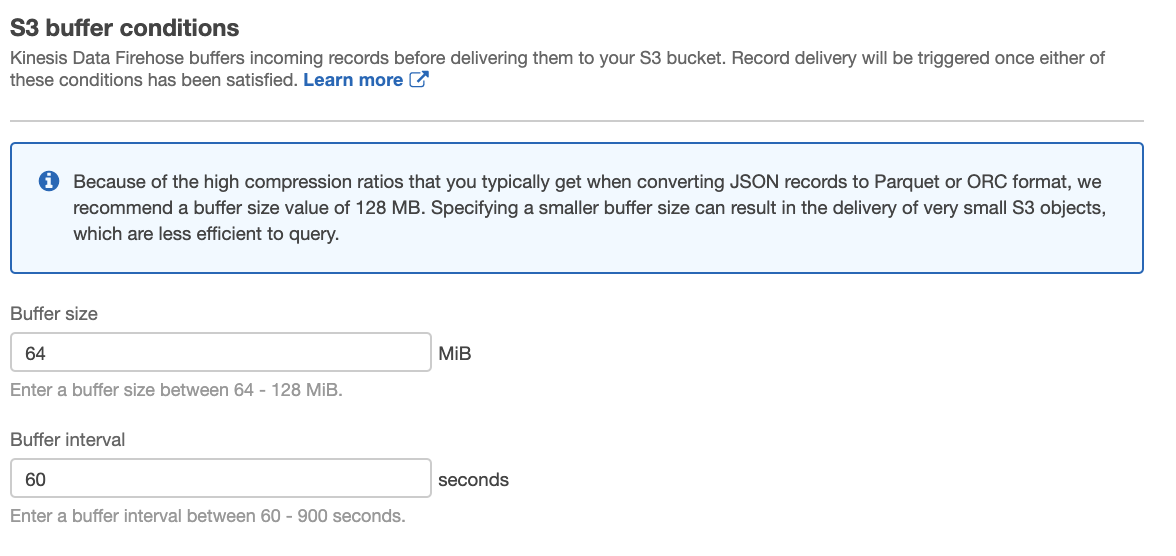

## 2) Wait until your stream is created, and run the code below:

## 3) Create a firehose client

In [ ]:
import json
import boto3

session = boto3.Session(profile_name='default')
client = boto3.client('firehose')

## 4) Send some records

In [ ]:
with open("ratings.json") as json_file:
    observations = json.load(json_file)
    for observation in observations:
        print(observation)
        response = client.put_record(
           DeliveryStreamName='mystream',
           Record={
                'Data': json.dumps(observation)
            }
        )
        print(response)

## 5) Run your glue crawler again, and it will create a new table. Thenquery your new table using Athena.